## Instalando pandas

Para instalar pandas, podemos usar condas o pip, dependiendo de la configuración de nuestro entorno de desarrollo.

`conda install pandas`

o

`pip install pandas`

Por ejemplo, podemos ejecutar:

In [1]:
# !conda install pandas

el signo ! indica que estamos ejecutando un commando del sistema.

Luego, importamos pandas usando la abreviación pd.
En python se recomienda importar paquetes usando abreviaciones para evitar conflictos con otros paquetes. Usualmente hay abrevaciones estandares para usar los paquetes. En el caso de pandas pd es la abreviación estandar.


In [2]:
import pandas as pd

## Componentes de pandas

Los componentes principales de pandas son: `Series` y `DataFrame`. 

<img src="imgs/series_df.png" alt="Series y DataFrames" style="width: 500px;"/>

Un `Series` es basicamente una columna. Y un `DataFrame` es basicamente una tabla compuesta de Series.

### Creando un DataFrame

Podemos crear un DataFrame directamente en Python. Una de las formas es usando diccionarios (`dict`).

Veamos:
    

In [3]:
data = {
    'nota 1': [12, 15, 18, 5],
    'nota 2': [5, 12, 15, 12]
}

print(data)

type(data)

{'nota 1': [12, 15, 18, 5], 'nota 2': [5, 12, 15, 12]}


dict

Nuestro diccionario tiene 2 elementos que corresponen a cada una de las Series.

Transformémoslo en un DataFrame de pandas:

In [4]:
notas = pd.DataFrame(data)

display(notas)

type(notas)

,nota 1,nota 2
0,12,5
1,15,12
2,18,15
3,5,12


pandas.core.frame.DataFrame

Pandas imprime nuestros datos como una tabla. Como vemos, las columnas son las series y los índices son los números de 0 a 3.

Si fueramos profesores de un curso, seguramente preferiríamos tener los nombres (o códigos) de los alumnos como índices. Veamos como hacer esto.


In [5]:
notas = pd.DataFrame(data, index=['Daniel', 'Alberto', 'Indira', 'Rocío'])

notas


,nota 1,nota 2
Daniel,12,5
Alberto,15,12
Indira,18,15
Rocío,5,12


Veamos, por ejemplo, las notas de Indira.

In [6]:
notas.loc['Indira']

nota 1    18
nota 2    15
Name: Indira, dtype: int64

Para eso hemos usado `loc`, que viene de la palabra en inglés locate. O sea, estamos localizando las notas de Indira.

Ahora, les voy a pedir que creen un DataFrame con una columna adicional (Series) de notas, llamada nota 3. 

In [7]:
data = {
    'nota 1': [12, 15, 18, 5],
    'nota 2': [5, 12, 15, 12],
    'nota 3': [14, 12, 18, 16]
}

notas = pd.DataFrame(data, index=['Daniel', 'Alberto', 'Indira', 'Rocío'])

notas

,nota 1,nota 2,nota 3
Daniel,12,5,14
Alberto,15,12,12
Indira,18,15,18
Rocío,5,12,16


Si queremos saber unicamente las notas del primer examen:

In [8]:
notas['nota 1']

Daniel     12
Alberto    15
Indira     18
Rocío       5
Name: nota 1, dtype: int64

Una de las cosas que el profe Jorge querría, es sacar el promedio de las notas. Veamos como...

In [9]:
notas.mean()

nota 1    12.5
nota 2    11.0
nota 3    15.0
dtype: float64

Viendo los promedios, podemos sacar algunas conclusiones.

Pero, imagino que lo que quería el profe Jorge es sacar los promedios por alumno, para tener la nota final.



In [10]:
notas.mean?

In [11]:
notas.mean(axis=1)

Daniel     10.333333
Alberto    13.000000
Indira     17.000000
Rocío      11.000000
dtype: float64

Algo interesante sería crear una columna con el promedio de notas.

In [12]:
notas['final'] = notas.mean(axis=1)

In [13]:
notas

,nota 1,nota 2,nota 3,final
Daniel,12,5,14,10.333333
Alberto,15,12,12,13.000000
Indira,18,15,18,17.000000
Rocío,5,12,16,11.000000


In [14]:
notas.final

Daniel     10.333333
Alberto    13.000000
Indira     17.000000
Rocío      11.000000
Name: final, dtype: float64

In [15]:
notas.final.round(2)

Daniel     10.33
Alberto    13.00
Indira     17.00
Rocío      11.00
Name: final, dtype: float64

El profe Jorge se acuerda que la nota final se calcula en base a un promedio ponderado. La primera y segunda nota tienen un peso de 30%, y la tercera de 40%. Veamos como hacer esto.

In [16]:
notas.final = 0.3*notas['nota 1'] +  0.3*notas['nota 2'] +  0.4*notas['nota 3'] 

notas

,nota 1,nota 2,nota 3,final
Daniel,12,5,14,10.7
Alberto,15,12,12,12.9
Indira,18,15,18,17.1
Rocío,5,12,16,11.5


Queremos saber los nombres de quien aprobó el curso, en este caso es fácil, pero si nuestra lista fuera más larga, tendríamos 


In [17]:
notas.final>=11.5

Daniel     False
Alberto     True
Indira      True
Rocío       True
Name: final, dtype: bool

In [18]:
notas[notas.final>=11.5]

,nota 1,nota 2,nota 3,final
Alberto,15,12,12,12.9
Indira,18,15,18,17.1
Rocío,5,12,16,11.5


In [19]:
aprobados = notas[notas.final>=11.5].index
aprobados

Index(['Alberto', 'Indira', 'Rocío'], dtype='object')

In [20]:
'Rocío' in aprobados

True

In [21]:
'Alberto' in aprobados

True

In [22]:
'Daniel' in aprobados

False

## Leyendo datos desde archivos

En un caso real, el profe Jorge tendría un archivo excel, o algún otro formato para guardar las notas. Vamos a ver como leer un archivo `csv` usando la biblioteca pandas. 

Pero vamos a cambiar de datos. Vamos a usar un dataset de Pokemon de primera generación (de los de la época del profe Jorge). Pandas nos facilita la tarea, y podemos leer el archivo usando una linea.


In [23]:
df = pd.read_csv('Pokemon.csv', encoding="ISO-8859-1" )


In [24]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


El comando head nos muestra los 5 primeros registros. En este caso vemos que la primera columna (#) debería ser el índice de nuestro DataFrame.

In [25]:
df = pd.read_csv('Pokemon.csv', encoding="ISO-8859-1", index_col=0 )


In [26]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


¿Y si queremos ver los 10 primeros registros? Algo me dice que podemos pasar un parámetro al método head para ver 10 columnas en lugar de 5. Veamos la aydua del método.

In [27]:
df.head?

In [28]:
df.head(n=10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False


¿Cuántos Pokemons son de primera generación? O sea, ¿cuántas filas tiene el DataFrame?. 

Para conocer el tamaño de un DataFrame tenemos varias opciones.

`len(df)` nos indica el número de filas del DataFrame.

In [29]:
len(df)

151

`df.shape` nos indica el número de filas y columnas del DataFrame.

In [30]:
df.shape

(151, 12)

`df.size` nos indica el número de celdas que tenemos en el DataFrame, en este caso 151 x 12.

In [31]:
df.size

1812

Regresando a nuestra lista de Pokemons...

In [32]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Vemos que los Pokemones tienen hasta 2 tipos. Y tenemos los puntajes de combate de cada uno de los 151 Pokemons originales. 

Recordando... ¿cómo extraemos solamente una columna del DataFrame? Por ejemplo, queremos extraer solamente los nombres de los Pokemons. Podemos extraer usando `df.Name` o `df['Name']`


In [33]:
df.Name

#
1       Bulbasaur
2         Ivysaur
3        Venusaur
4      Charmander
5      Charmeleon
          ...    
147       Dratini
148     Dragonair
149     Dragonite
150        Mewtwo
151           Mew
Name: Name, Length: 151, dtype: object

In [34]:
df['Name']

#
1       Bulbasaur
2         Ivysaur
3        Venusaur
4      Charmander
5      Charmeleon
          ...    
147       Dratini
148     Dragonair
149     Dragonite
150        Mewtwo
151           Mew
Name: Name, Length: 151, dtype: object

¿Y si queremos extraer solamente el puntaje de Ataque?

In [35]:
df.Attack

#
1       49
2       62
3       82
4       52
5       64
      ... 
147     64
148     84
149    134
150    110
151    100
Name: Attack, Length: 151, dtype: int64

¿Alguien se acuerda como extraer el promedio?

In [36]:
df.Attack.mean()

72.54966887417218

In [37]:
df.mean()

Total        407.079470
HP            64.211921
Attack        72.549669
Defense       68.225166
Sp. Atk       67.139073
Sp. Def       66.019868
Speed         68.933775
Stage          1.582781
Legendary      0.026490
dtype: float64

¿Y si queremos extraer el nombre y el puntaje de ataque?

In [38]:
df[['Name', 'Attack']]

,Name,Attack
#,,
1,Bulbasaur,49
2,Ivysaur,62
3,Venusaur,82
4,Charmander,52
5,Charmeleon,64
...,...,...
147,Dratini,64
148,Dragonair,84
149,Dragonite,134


Podemos comenzar a responder algunas preguntas. Por ejemplo, ¿cuál es el Pokemon con un mayor Ataque? Para responder esta pregunta, respondamos primero cuál es el valor del mayor ataque.

In [39]:
df.Attack.max()

134

¿Cómo calcular el menor ataque?

In [40]:
df.Attack.min()

5

Regresemos a la pregunta, ¿cuál es el Pokemon con un mayor Ataque?

In [41]:
df[df.Attack == df.Attack.max()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False


Dragonite! 

<img src="imgs/Dragonite.webp" alt="Series y DataFrames" style="width: 200px;"/>


¿Y el Pokemon con el menor ataque?

In [42]:
df[df.Attack == df.Attack.min()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False


Chansey! 

<img src="imgs/113Chansey.webp" alt="Series y DataFrames" style="width: 200px;"/>


Tenemos también el estado de evolución de cada Pokemon y un Boolean que nos indica si el Pokemon es legendario o no.

¿Cómo obtener la lista de Pokemons legendarios?

In [43]:
df.Legendary

#
1      False
2      False
3      False
4      False
5      False
       ...  
147    False
148    False
149    False
150     True
151    False
Name: Legendary, Length: 151, dtype: bool

In [44]:
df[df.Legendary]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


¿Cuántos tipos de Pokemons hay en nuestro DataFrame?

In [45]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

In [46]:
len(df['Type 1'].unique())

15

¿Cuántos Pokemons hay de cada tipo?


In [47]:
df.groupby('Type 1').groups

{'Bug': Int64Index([10, 11, 12, 13, 14, 15, 46, 47, 48, 49, 123, 127], dtype='int64', name='#'),
 'Dragon': Int64Index([147, 148, 149], dtype='int64', name='#'),
 'Electric': Int64Index([25, 26, 81, 82, 100, 101, 125, 135, 145], dtype='int64', name='#'),
 'Fairy': Int64Index([35, 36], dtype='int64', name='#'),
 'Fighting': Int64Index([56, 57, 66, 67, 68, 106, 107], dtype='int64', name='#'),
 'Fire': Int64Index([4, 5, 6, 37, 38, 58, 59, 77, 78, 126, 136, 146], dtype='int64', name='#'),
 'Ghost': Int64Index([92, 93, 94], dtype='int64', name='#'),
 'Grass': Int64Index([1, 2, 3, 43, 44, 45, 69, 70, 71, 102, 103, 114], dtype='int64', name='#'),
 'Ground': Int64Index([27, 28, 50, 51, 104, 105, 111, 112], dtype='int64', name='#'),
 'Ice': Int64Index([124, 144], dtype='int64', name='#'),
 'Normal': Int64Index([ 16,  17,  18,  19,  20,  21,  22,  39,  40,  52,  53,  83,  84,
              85, 108, 113, 115, 128, 132, 133, 137, 143],
            dtype='int64', name='#'),
 'Poison': Int64Index([2

Ahí tenemos la lista, pero lo que el maestro Jorge quiere saber es cuántos Pokemons hay de cada tipo. Podemos contar, pero para eso tenemos a la computadora.


In [48]:
df.groupby('Type 1').size()

Type 1
Bug         12
Dragon       3
Electric     9
Fairy        2
Fighting     7
Fire        12
Ghost        3
Grass       12
Ground       8
Ice          2
Normal      22
Poison      14
Psychic      8
Rock         9
Water       28
dtype: int64

In [49]:
df.groupby('Type 1').size().sort_values()

Type 1
Fairy        2
Ice          2
Dragon       3
Ghost        3
Fighting     7
Ground       8
Psychic      8
Electric     9
Rock         9
Bug         12
Fire        12
Grass       12
Poison      14
Normal      22
Water       28
dtype: int64

In [50]:
df.groupby('Type 1').size().sort_values(ascending=False)

Type 1
Water       28
Normal      22
Poison      14
Grass       12
Fire        12
Bug         12
Rock         9
Electric     9
Psychic      8
Ground       8
Fighting     7
Ghost        3
Dragon       3
Ice          2
Fairy        2
dtype: int64

El maestro Jorge quiere también saber cuántos Pokemons de las combinaciones de Tipo 1 y Tipo 2 hay. Por ejemplo Bulbaseur es de tipo Planta y Veneno (Grass y Poison en inglés).


In [51]:
df.groupby(['Type 1', 'Type 2']).size()

Type 1    Type 2  
Bug       Flying      2
          Grass       2
          Poison      5
Dragon    Flying      1
Electric  Flying      1
          Steel       2
Fire      Flying      2
Ghost     Poison      3
Grass     Poison      9
          Psychic     2
Ground    Rock        2
Ice       Flying      1
          Psychic     1
Normal    Fairy       2
          Flying      8
Poison    Flying      2
          Ground      2
Psychic   Fairy       1
Rock      Flying      1
          Ground      4
          Water       4
Water     Fighting    1
          Flying      1
          Ice         3
          Poison      2
          Psychic     3
dtype: int64

In [52]:
df.groupby(['Type 1', 'Type 2']).size().sort_values(ascending=False)

Type 1    Type 2  
Grass     Poison      9
Normal    Flying      8
Bug       Poison      5
Rock      Water       4
          Ground      4
Water     Psychic     3
          Ice         3
Ghost     Poison      3
Ground    Rock        2
Bug       Grass       2
Electric  Steel       2
Fire      Flying      2
Grass     Psychic     2
Bug       Flying      2
Water     Poison      2
Normal    Fairy       2
Poison    Flying      2
          Ground      2
Ice       Flying      1
Psychic   Fairy       1
Rock      Flying      1
Electric  Flying      1
Dragon    Flying      1
Water     Fighting    1
          Flying      1
Ice       Psychic     1
dtype: int64

## Visualizando estas cuentas

Lo primero, es importar seaborn. Como recordamos una buena práctica es importar los paquetes y usar el alias estándar. En caso de `seaborn`, el alias estándar es `sns`.



In [53]:
import seaborn as sns

sns.set_style("darkgrid")

%config InlineBackend.figure_format = 'retina'


Bad key savefig.frameon in file /Users/paola/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/paola/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/paola/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an 

Ahora, vamos a mostrar un gráfico de barras del número de pokemons por tipo.

<AxesSubplot:xlabel='Type 1', ylabel='count'>

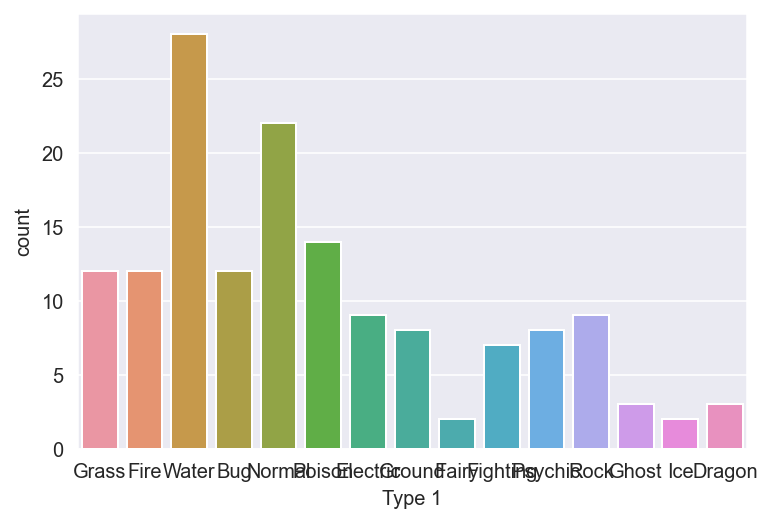

In [54]:
sns.countplot(x='Type 1', data=df)
 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon')])

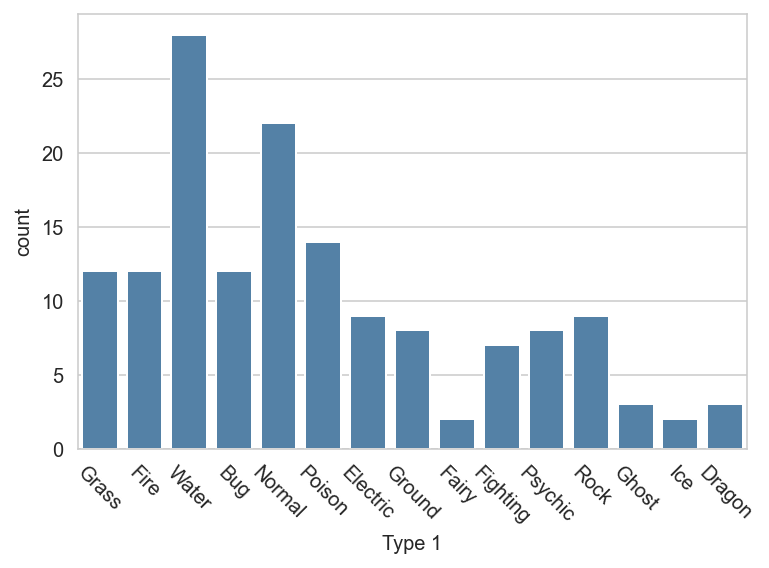

In [55]:
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

sns.countplot(x='Type 1', data=df, color='steelblue')

plt.xticks(rotation=-45)

## Analizando las estadísticas de combate

Veamos de nuevo las 10 primeras filas de nuestro DataFrame de Pokemons.



In [56]:
df.head(n=10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False


## Visualizando estadísticas de los pokemons

Hemos visto como calcular el promedio de las estadísticas de los pokemons.


In [57]:
df.mean()

Total        407.079470
HP            64.211921
Attack        72.549669
Defense       68.225166
Sp. Atk       67.139073
Sp. Def       66.019868
Speed         68.933775
Stage          1.582781
Legendary      0.026490
dtype: float64

Visualizarlo sería más interesante.

<AxesSubplot:>

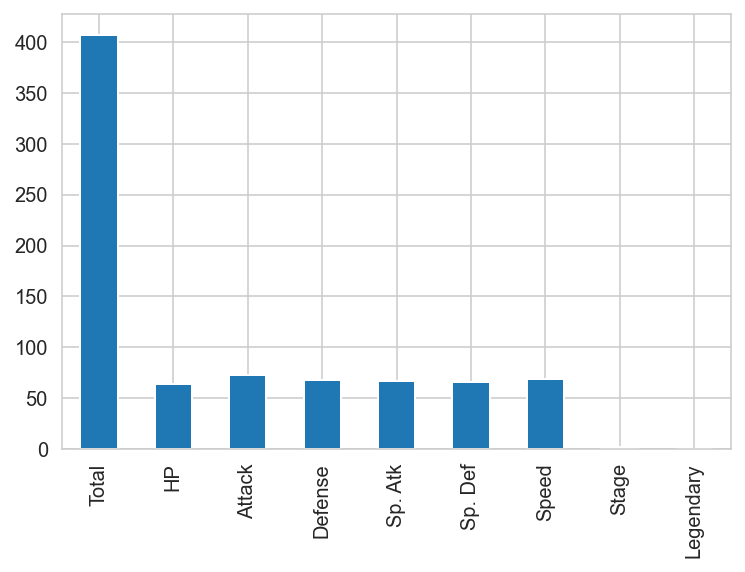

In [58]:
df.mean().plot.bar()

Pandas calcula la media de todos los elementos que pueden ser transformados a números. Por ejemplo, Legendary es booleano, el valor  `True` suele ser interpretado como 1 y el valor `False` como 0. Por otro lado, Name es un String (cadena de caracteres), y no puede ser faclmente transformado a un valor numérico.

Pero en realidad no nos interesa ver ni Stage, ni Legendary, ya que no son estadísticas de combate. Y podemos también remover Total, ya que en realidad es una suma de todas las otras estadísticas.
Vamos a crear otro DataFrame sin esas columnas.


In [59]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

Visualizemos de nuevo la media de este nuevo DataFrame.

<AxesSubplot:>

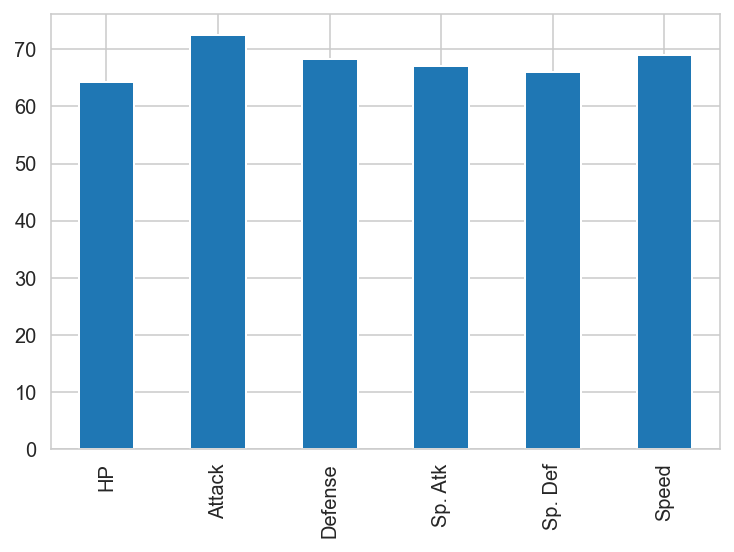

In [60]:
stats_df.mean().plot.bar()

Visualizar la media esta bien, pero en realidad perdemos mucha información al visualizar solamente la media. Aún más importante, la media suele ser un valor que nos puede llevar a conclusiones erradas. 

Por ejemplo, en una clase de 5 alumnos, si la aprobación del profe Jorge es: 13, 14, 12, 13, 12. Y la aprobación de la profe Nereida es 16, 16, 17, 15, 0. La media de ambos sería... 


In [61]:
aprobacion_nereida = pd.Series([16, 16, 17, 15, 0])
aprobacion_nereida.mean()

12.8

In [62]:
aprobacion_jorge = pd.Series([13, 14, 12, 13, 12])
aprobacion_jorge.mean()

12.8

Una mejor medida, podría ser la mediana.

In [63]:
aprobacion_nereida.median()

16.0

In [64]:
aprobacion_jorge.median()

13.0

Pero cuando analizamos datos, es interesante ver el máximo, mínimo, la distribución de los datos, y porqué no todos los valores. En el ejemplo de las aprobaciones, tenemos 5 valores, podemos ver todos los valores y sacar conclusiones. Cuando tenemos más valores, es mejor visualizar los datos.

Regresando a los pokemons, veamos como hacer un plot que nos de información de los valores máximo, mínimo, y nos de una idea de la distribución de los datos: un bloxplot.


<AxesSubplot:>

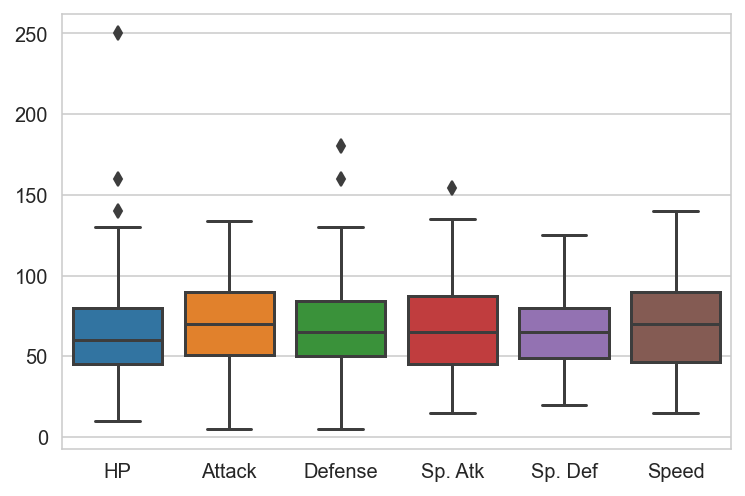

In [65]:
sns.boxplot(data=stats_df)

Otras alternativas son violinplot o swarmplot. Veamos como se ven estas alternativas.

<AxesSubplot:>

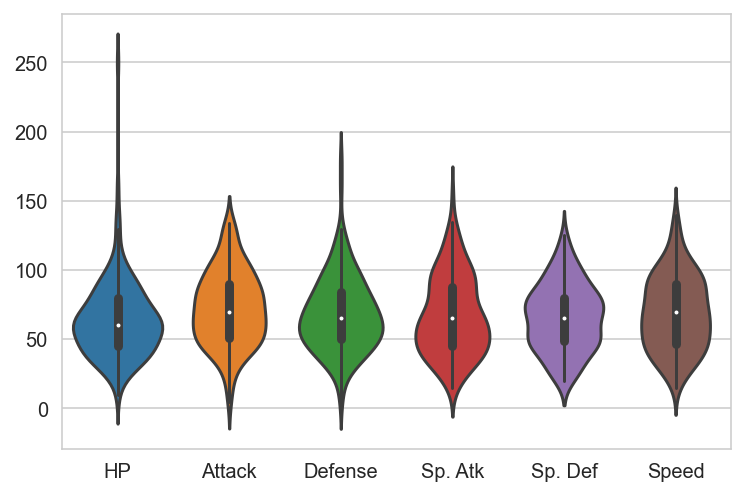

In [66]:
sns.violinplot(data=stats_df)

/Users/paola/miniconda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 40.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/paola/miniconda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/paola/miniconda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/paola/miniconda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/paola/miniconda/lib/python3.7/site-packages/seaborn/categorical.p

<AxesSubplot:>

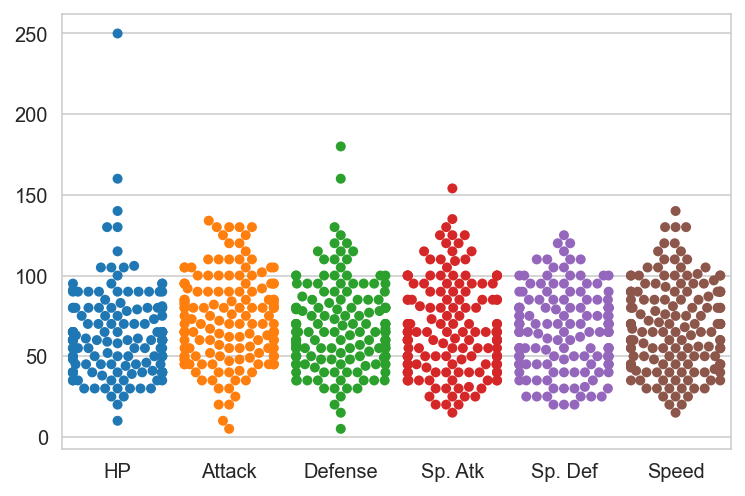

In [67]:
sns.swarmplot(data=stats_df)

<AxesSubplot:>

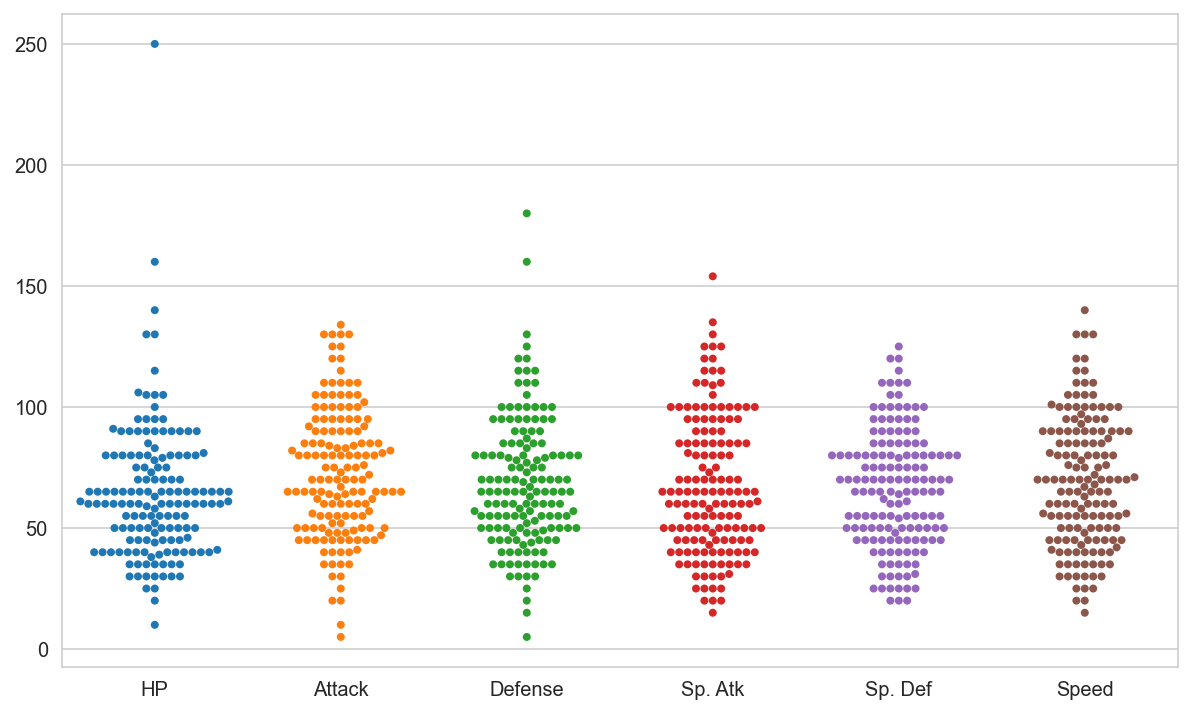

In [68]:
plt.figure(figsize=(10,6))

sns.swarmplot(data=stats_df, size=4)

<AxesSubplot:>

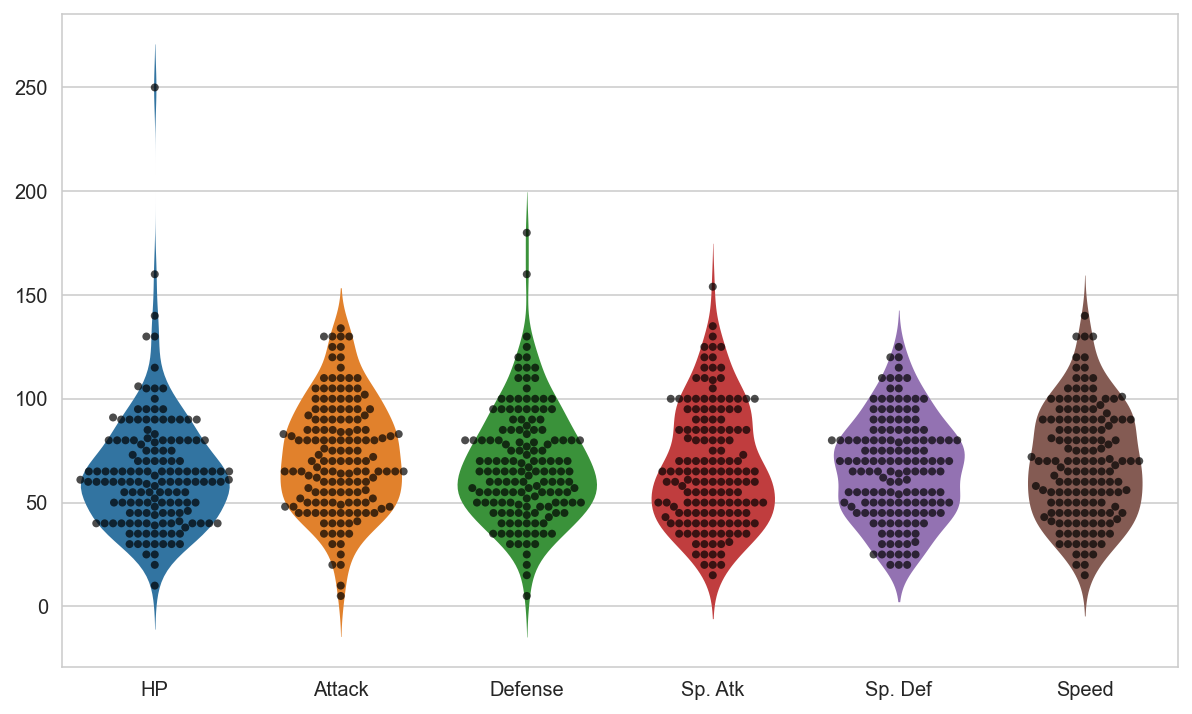

In [69]:
plt.figure(figsize=(10,6))

sns.violinplot(data=stats_df, 
               inner=None,
              linewidth=0)

sns.swarmplot(data=stats_df, 
              color='k', 
              alpha=0.7, 
              size=4)

Hagamos un plot parecido pero del valor de Ataque dividido por tipo.

Text(0.5, 1.0, 'Ataque por Tipo')

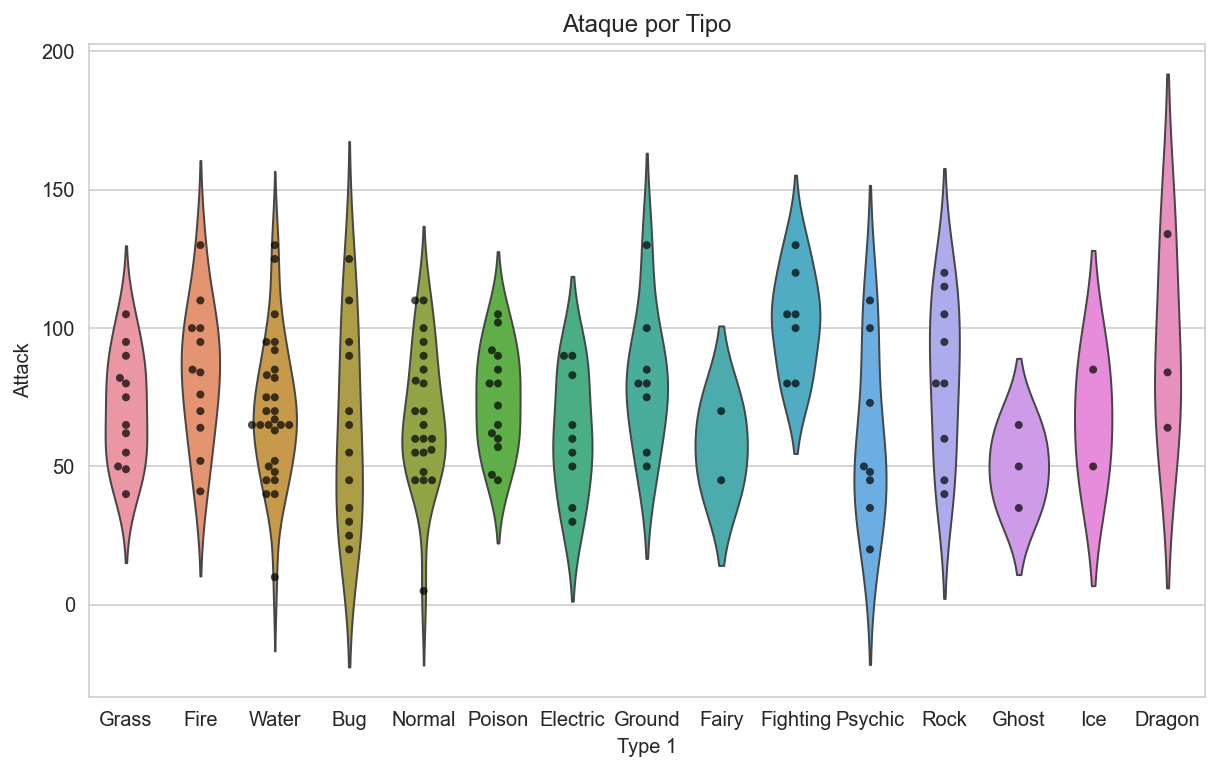

In [70]:
plt.figure(figsize=(10,6))
 

sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None,
               linewidth=1)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', 
              alpha=0.7, 
              size=4)

plt.title('Ataque por Tipo')

Text(0.5, 1.0, 'Defensa por Tipo')

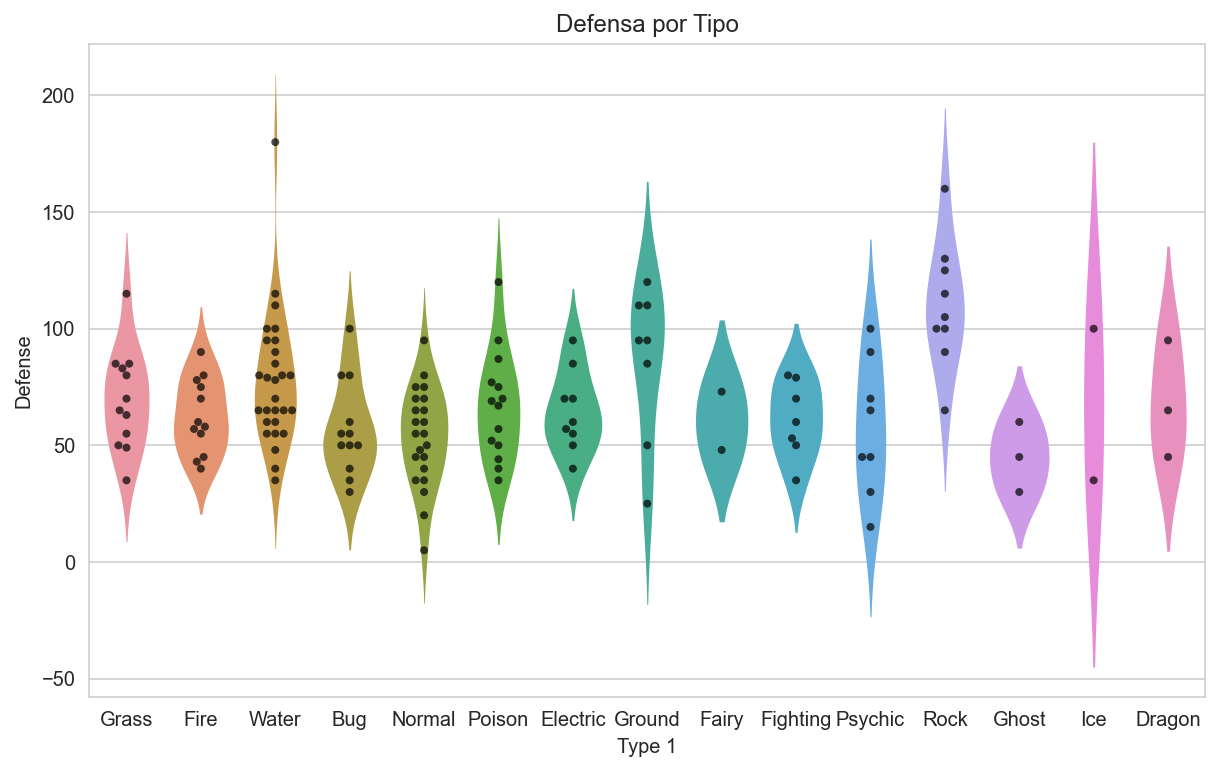

In [71]:
plt.figure(figsize=(10,6))
 

sns.violinplot(x='Type 1',
               y='Defense', 
               data=df, 
               inner=None,
               linewidth=0)
 
sns.swarmplot(x='Type 1', 
              y='Defense', 
              data=df, 
              color='k', 
              alpha=0.7, 
              size=4)

plt.title('Defensa por Tipo')

Veamos ahora el ataque por estado de evolución. Y luego defensa por estado de evolución.

Text(0.5, 1.0, 'Ataque por Evolución')

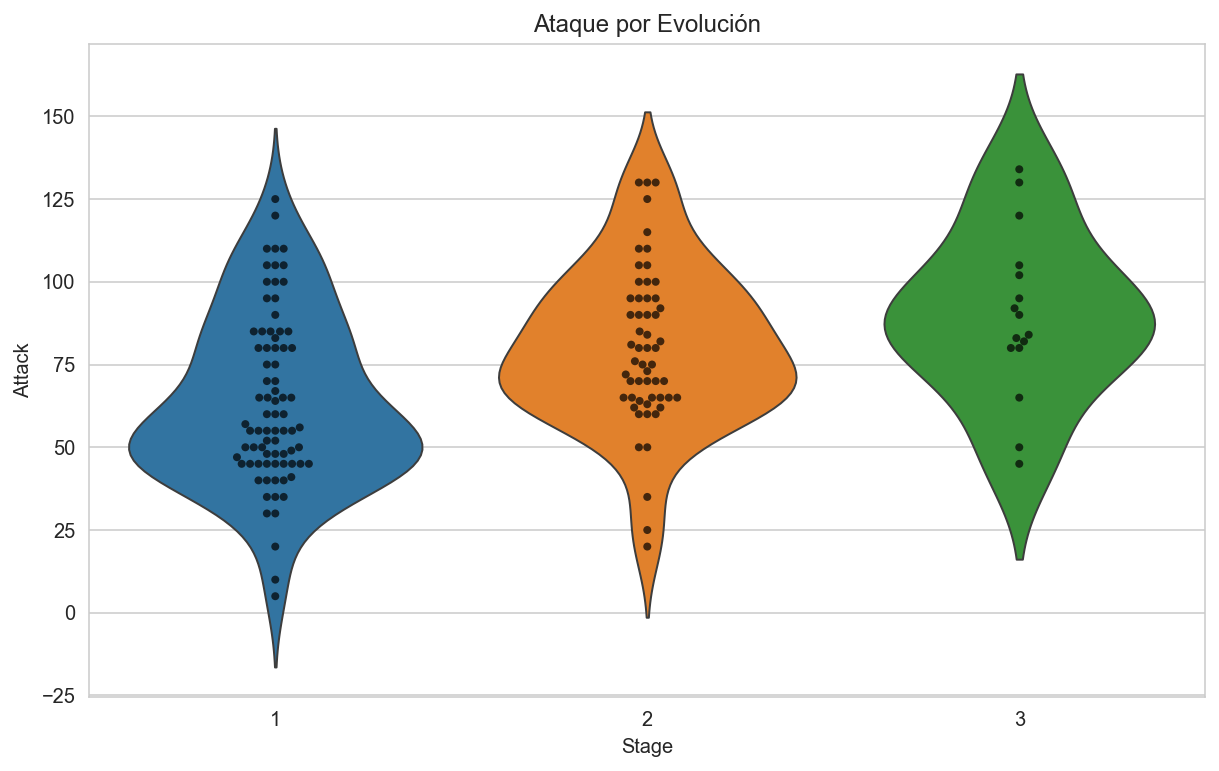

In [72]:
plt.figure(figsize=(10,6))
 

sns.violinplot(x='Stage',
               y='Attack', 
               data=df, 
               inner=None,
               linewidth=1)
 
sns.swarmplot(x='Stage', 
              y='Attack', 
              data=df, 
              color='k', 
              alpha=0.7, 
              size=4)

plt.title('Ataque por Evolución')

Text(0.5, 1.0, 'Ataque por Evolución')

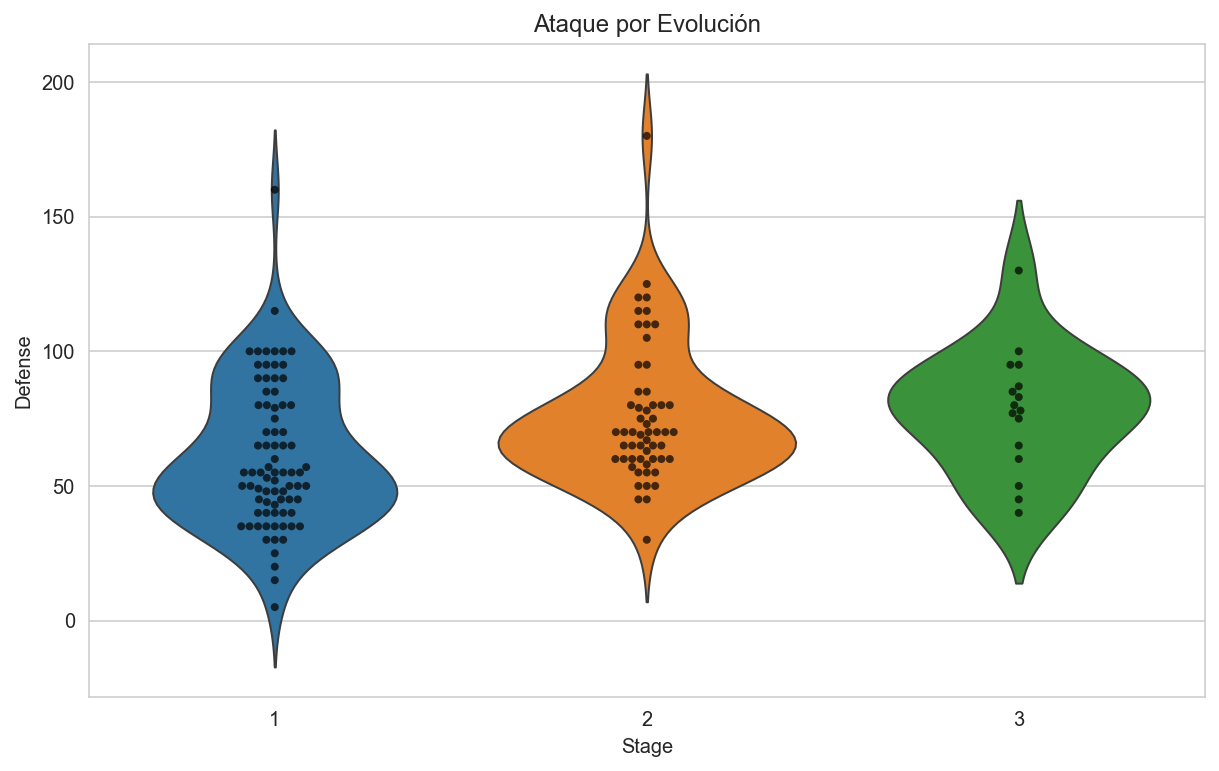

In [73]:
plt.figure(figsize=(10,6))
 

sns.violinplot(x='Stage',
               y='Defense', 
               data=df, 
               inner=None,
               linewidth=1)
 
sns.swarmplot(x='Stage', 
              y='Defense', 
              data=df, 
              color='k', 
              alpha=0.7, 
              size=4)

plt.title('Ataque por Evolución')

## Comparando estadísticas

El maestro Jorge quiere saber si un Pokemon con un valor grande de ataque tiene también un valor grande de defensa. O sea, quiere saber si hay una correlación entre las Series de Ataque y de Defensa.


Podemos usar una fórmula matemática, pero vamos a ver como hacerlo visualmente. Para ello, vamos a usar `seaborn`.


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

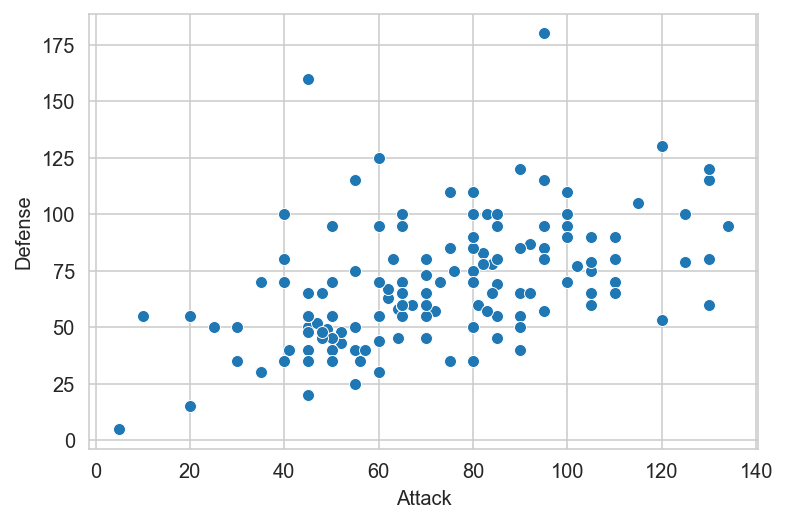

In [74]:
sns.scatterplot(x='Attack', y='Defense', data=df)

Vemos que hay una tendencia, mientras mayor el valor de ataque, mayor el valor de defensa.
El maestro pokemon se pregunta si mientras más evolucionado un pokemon, su ataque y defensa es mayor. Para ello vamos a usar el tono (`hue` en inglés) del color para diferenciar el estado de evolución de los pokemons.

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

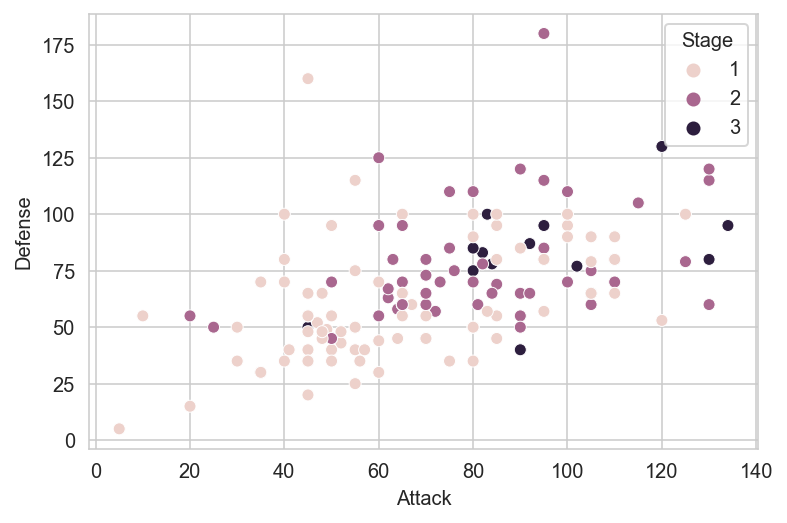

In [75]:
sns.scatterplot(x='Attack', y='Defense', data=df, hue='Stage')


In [76]:
df.dtypes


Name         object
Type 1       object
Type 2       object
Total         int64
HP            int64
Attack        int64
Defense       int64
Sp. Atk       int64
Sp. Def       int64
Speed         int64
Stage         int64
Legendary      bool
dtype: object

In [77]:
df.Stage = df.Stage.astype('category')

In [78]:
df.dtypes

Name           object
Type 1         object
Type 2         object
Total           int64
HP              int64
Attack          int64
Defense         int64
Sp. Atk         int64
Sp. Def         int64
Speed           int64
Stage        category
Legendary        bool
dtype: object

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

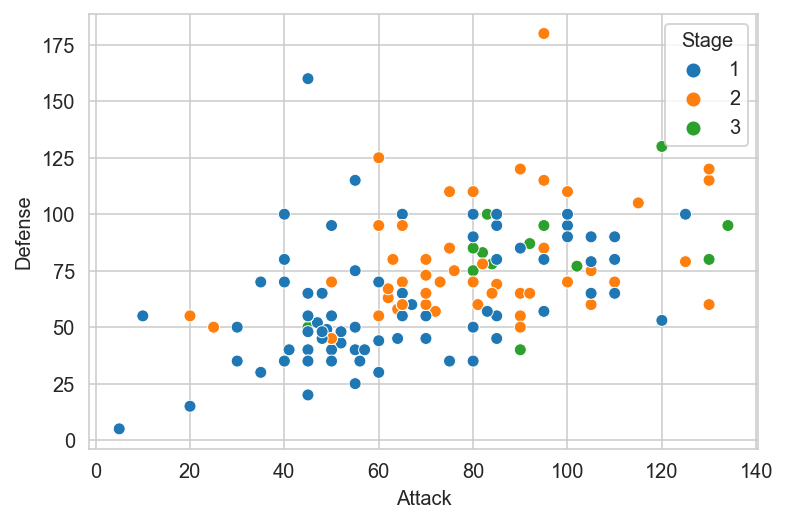

In [79]:
sns.scatterplot(x='Attack', y='Defense', data=df, hue='Stage')


Nos preguntamos si los Pokemons legendarios se diferencian en ataque y defensa de los demás pokemons. Para ello esta vez vamos a usar el color para diferenciar los Pokemons legendarios.

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

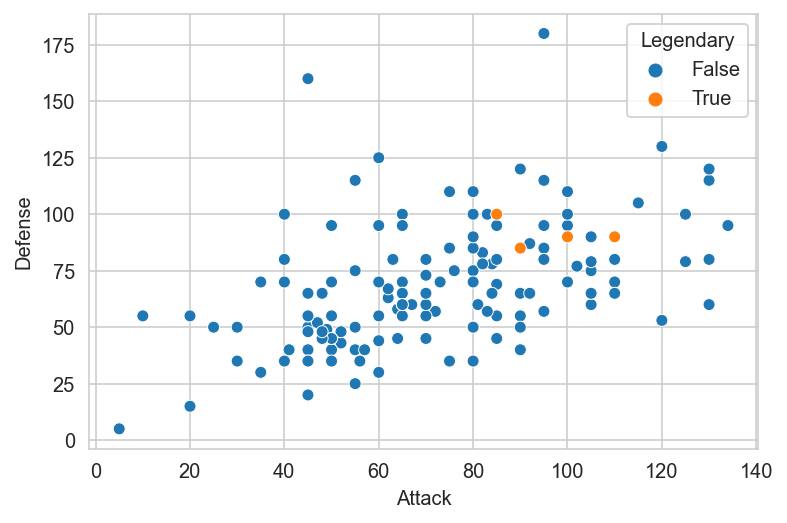

In [80]:
sns.scatterplot(x='Attack', y='Defense', data=df, hue='Legendary')


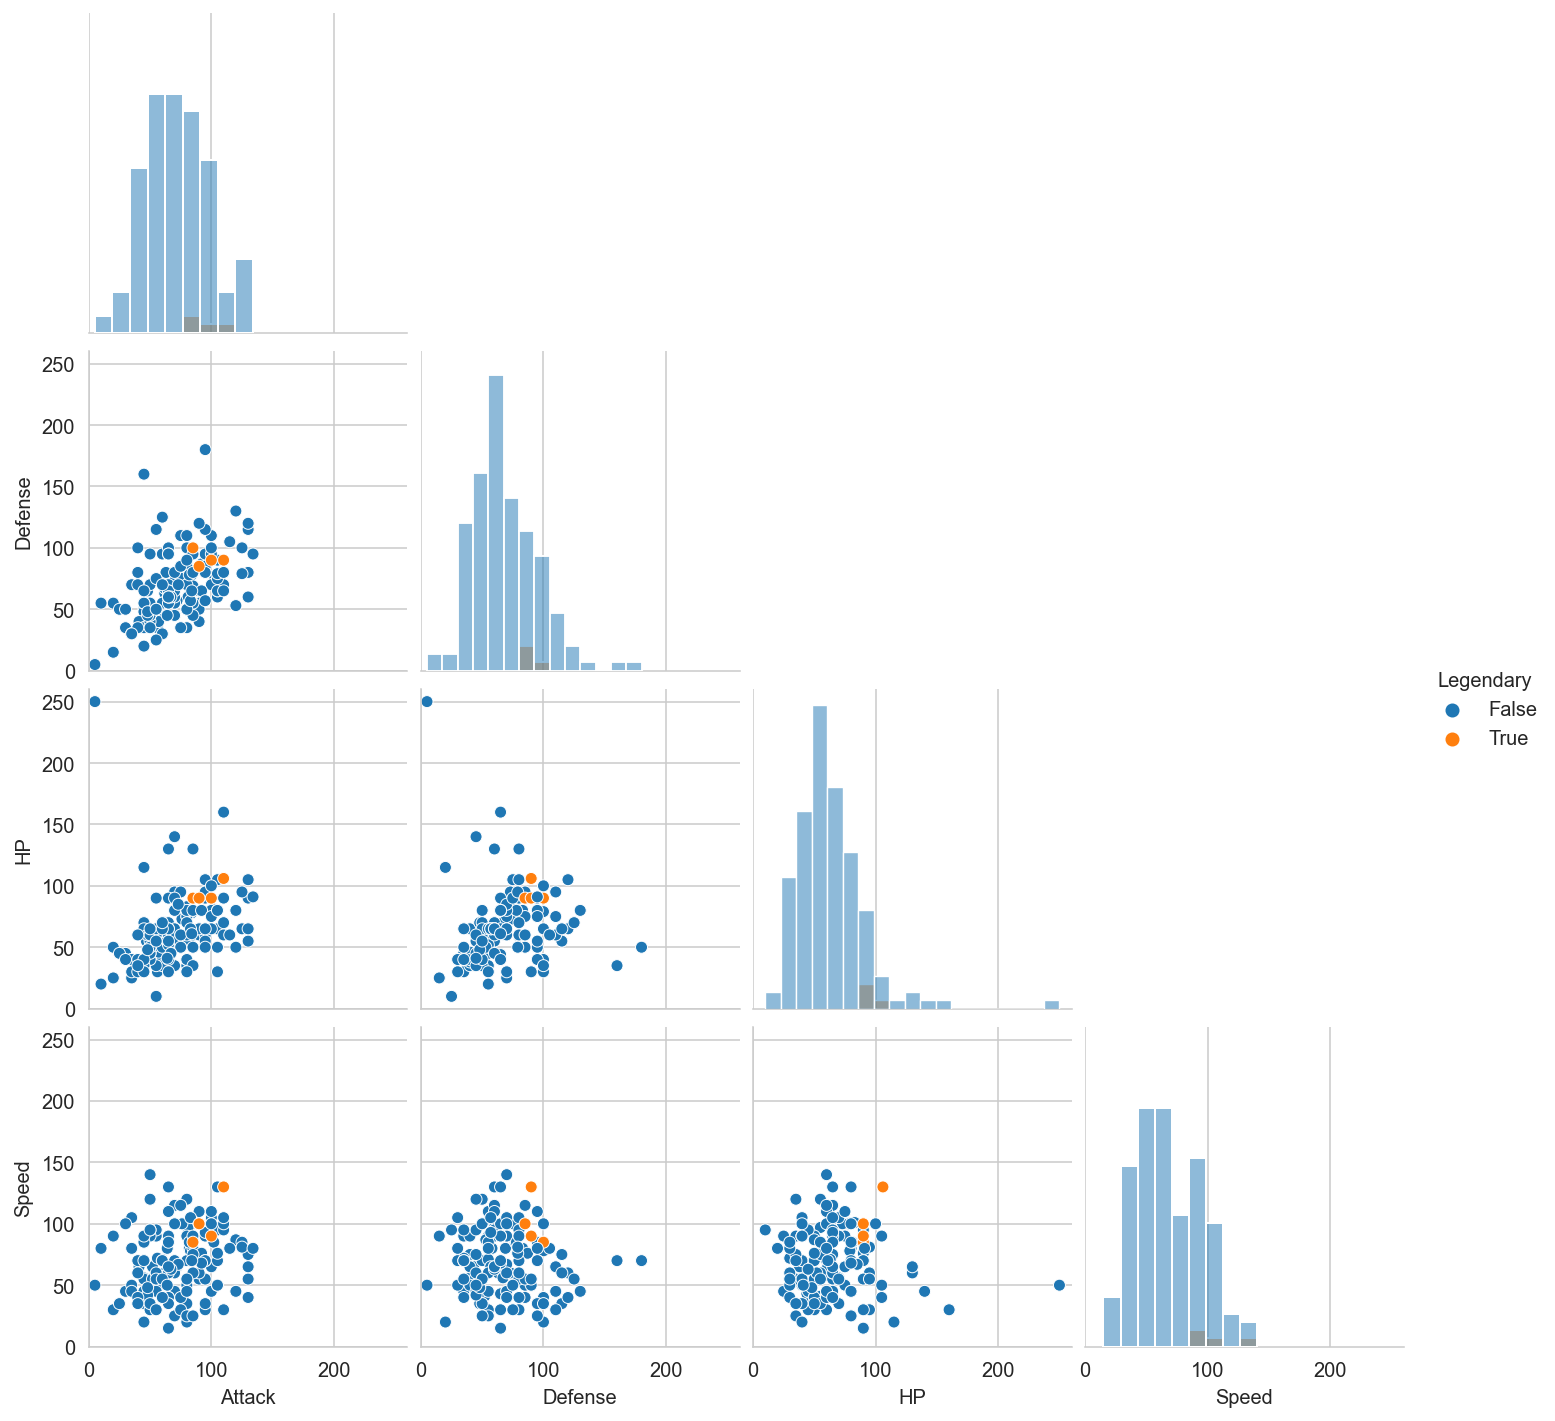

In [81]:
pairplot = sns.pairplot(df, 
                        hue="Legendary", 
                        vars=['Attack', 'Defense', 'HP', 'Speed'], 
                        diag_kind="hist",
                        corner=True)
pairplot.set(xlim=(0,260), ylim = (0,260))


## Bonus Track: visualizando nubes de palabras

Para visualizar nubes de palabras, vamos a usar los paquetes `wordcloud` y `stop-words`

`!conda install -c conda-forge wordcloud -y`

`!conda install -c conda-forge stop-words -y`


In [82]:
from wordcloud import WordCloud


Necesitamos un texto para generar la nube de palabras. Vamos a visualizar el discurso de nuetro más reciente presidente. 


In [83]:
ls

Discurso-de-Investidura-de-Francisco-Sagasti.txt
Discurso-de-Investidura-de-Merino.txt
Pandas y Seaborn.ipynb
Pokemon.csv
README.md
imgs/


In [84]:
file_name = 'Discurso-de-Investidura-de-Francisco-Sagasti.txt'

with open(file_name) as file:
    discurso = file.read()

In [85]:
print(discurso)

Señora presidente del Congreso de la República, señores ……,


conciudadanos todos.


Agradezco al Congreso, a la ciudadanía, este agradecimiento es
también un compromiso con el país.


Sean mis primeras palabras para pedir un minuto de silencio, en
homenaje a los jóvenes ciudadanos JACK BRYAN PINTADO SÁNCHEZ
y JORDAN INTI SOTELO CAMARGO, lamentablemente fallecidos
durante las últimas jornadas de movilización ciudadana, realizadas
en ejercicio legítimo del derecho fundamental a la protesta,
consagrado por nuestra Constitución Política.


No podemos devolver a la vida a estos jóvenes, pero sí podemos
evitar que esto vuelva a suceder. Podemos, además, apoyar a los
heridos, algunos de ellos de gravedad. En nombre del Estado,
pedimos perdón a sus familiares, a ellos y a todos los jóvenes que
marcharon para defender la democracia, y que nos hicieron recordar
lo que es la vocación de servicio.


En el Perú, y en el mundo entero, estamos viviendo tiempos de
incertidumbre extrema, de inconsiste

In [86]:
wordcloud = WordCloud().generate(discurso)


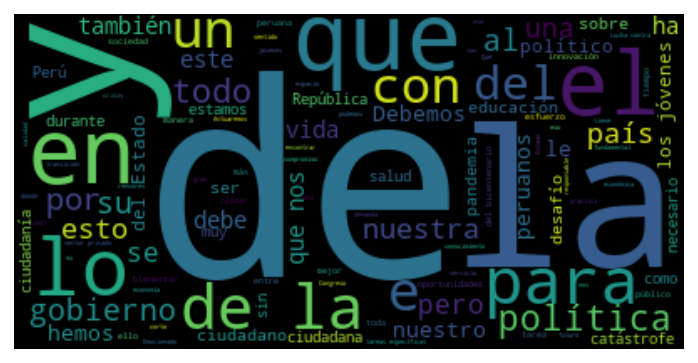

In [87]:
# Mostramos la imagen
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [88]:
from stop_words import get_stop_words

stop_words = set(get_stop_words('spanish'))

stop_words

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

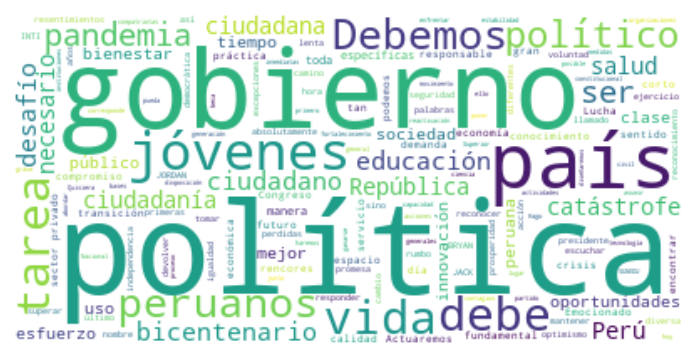

In [89]:
wordcloud = WordCloud(stopwords=stop_words, 
                      background_color="white",
                     ).generate(discurso)

# Mostramos la imagen
plt.imshow(wordcloud, 
           interpolation='bilinear')
plt.axis("off")
plt.show()

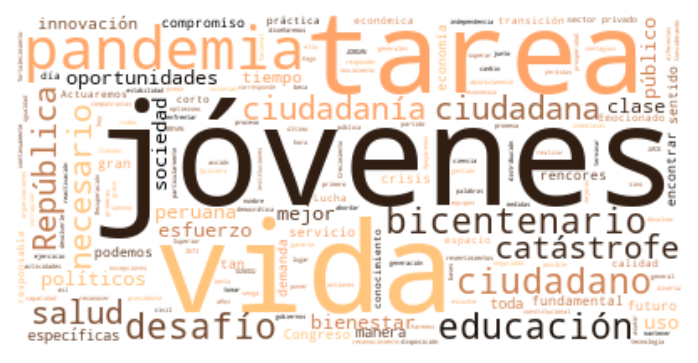

In [97]:
stop_words.update(["debemos", "debe", "gobierno", "política",  "político", "país", "perú", "peruanos", "ser"])


wordcloud = WordCloud(stopwords=stop_words, 
                      background_color="white",
                       colormap='copper',
                     ).generate(discurso)

# Mostramos la imagen
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [91]:
import numpy as np
from PIL import Image

mask = np.array(Image.open("imgs/peru_map.png"), np.int64)
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

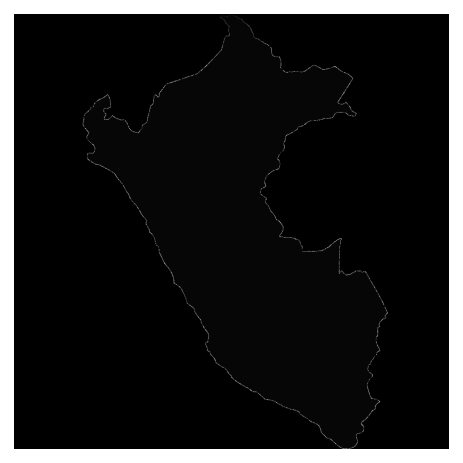

In [92]:
plt.imshow(mask, cmap=plt.cm.Greys_r)
plt.axis("off")
plt.show()

In [93]:
mask[mask!=0] = 255
mask = np.abs(mask-255)

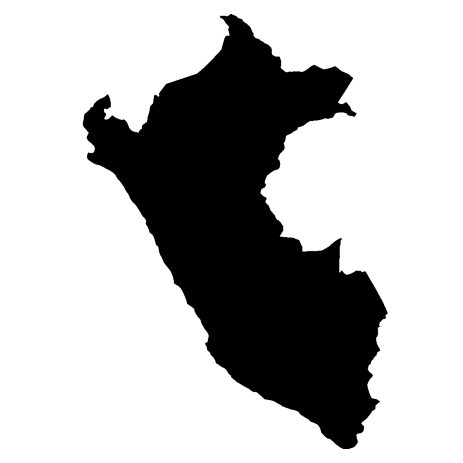

In [94]:
plt.imshow(mask, cmap=plt.cm.Greys_r)
plt.axis("off")
plt.show()

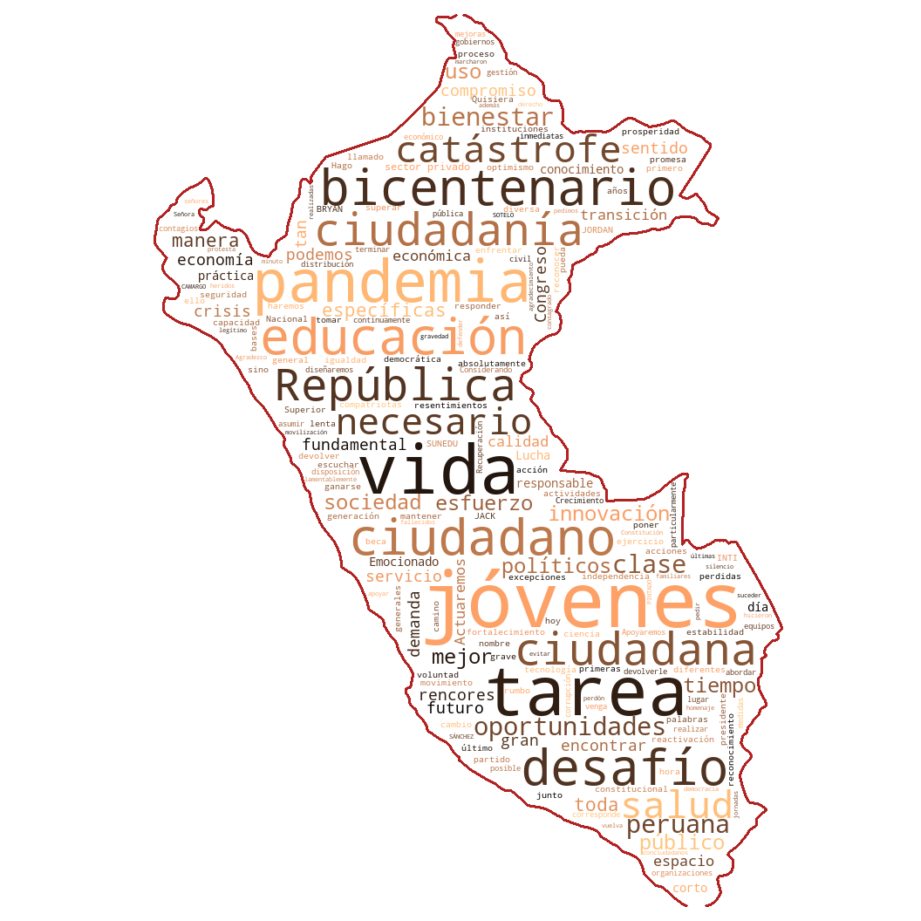

In [98]:
plt.figure(figsize=(8, 16))
wordcloud = WordCloud(stopwords=stop_words, 
                      background_color="white",
                      colormap='copper',
                      max_words=200, 
                      mask=mask,
                      contour_width=3, 
                      contour_color='firebrick'
                     ).generate(discurso)

# Mostramos la imagen
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

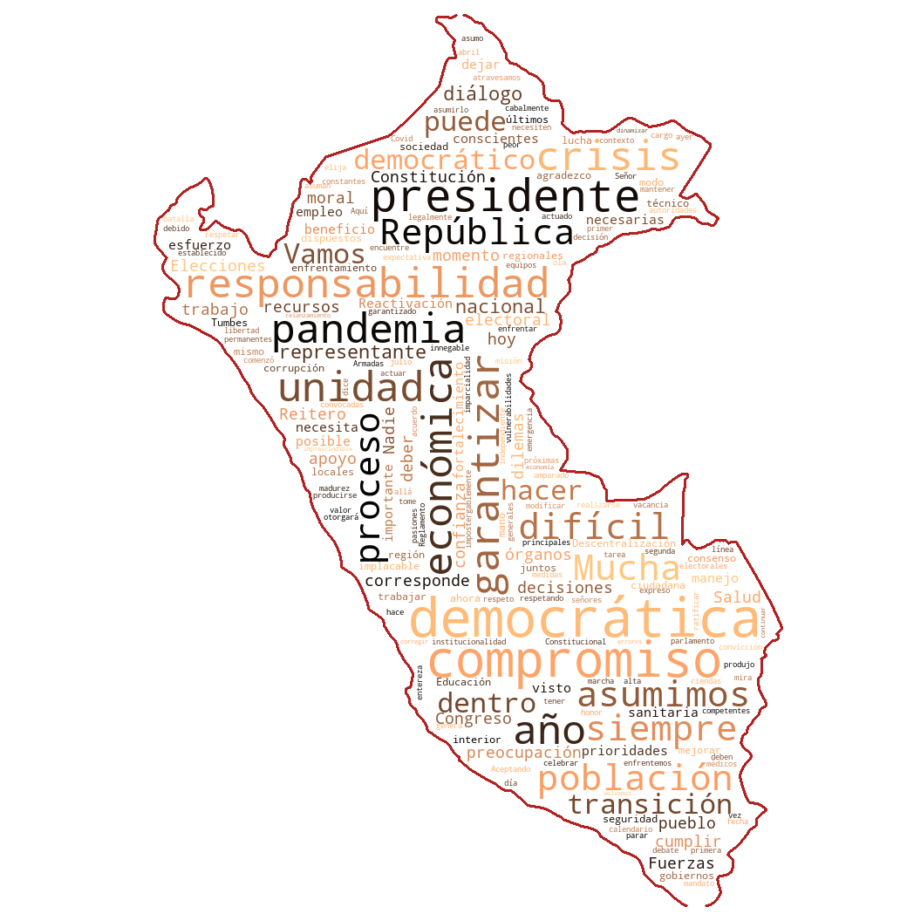

In [99]:
file_name = 'Discurso-de-Investidura-de-Merino.txt'

with open(file_name) as file:
    discurso_merino = file.read()
    
plt.figure(figsize=(8, 16))
wordcloud = WordCloud(stopwords=stop_words, 
                      background_color="white",
                      colormap='copper',
                      max_words=200, 
                      mask=mask,
                      contour_width=3, 
                      contour_color='firebrick'
                     ).generate(discurso_merino)

# Mostramos la imagen
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()